In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### 평균 4, 표준편차 0.8인 정규분포를 따르는 모집자

In [2]:
population = stats.norm(loc = 4, scale = 0.8)
type(population)

scipy.stats._distn_infrastructure.rv_frozen

#### 표본평균을 10000개 얻는 코드

In [3]:
sample_mean_array = np.zeros(10000)
np.random.seed(13)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

In [4]:
sample_mean_array

array([4.3976666 , 4.18857764, 3.8425394 , ..., 4.12495865, 4.12127892,
       4.05054023])

In [5]:
population.rvs(size=10)

array([3.33677644, 4.79394837, 4.36255655, 3.90214059, 3.64102224,
       4.75492204, 3.42363925, 3.729252  , 3.56047187, 3.90890456])

In [6]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 표본평균은 모집단의 평균과 유사하다

In [7]:
np.mean(sample_mean_array)

4.003651723722899

#### 표본평균의 표준편차는 차이가 많이 난다 

In [8]:
np.std(sample_mean_array, ddof=0)

0.25328735533634056

In [9]:
np.std(sample_mean_array, ddof=1)

0.25330002065401414

#### 표본평균의 히스토그램

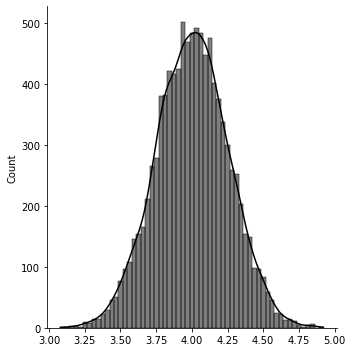

In [10]:
sns.displot(sample_mean_array, color = 'black', kde=True)

#### 샘플사이즈를 다양하게 만들고

In [11]:
size_array = np.arange(10, 100100, 100)
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(13)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

#### 샘플사이즈가 커지면 모집단의 평균인 4에 근접해간다

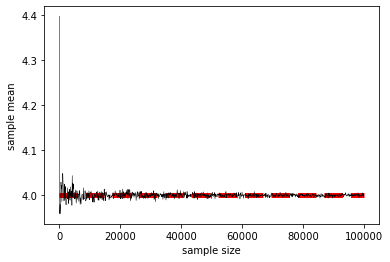

In [12]:
plt.plot(size_array, sample_mean_array_size, color='black', lw=0.5)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.hlines(4, 0, 100000, color='red', lw=5, linestyles='dashed')
plt.show()

#### 평균을 계산하는 함수

In [13]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [14]:
size_array = np.arange(2, 102, 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

#### 샘플 사이즈 별로 표준편차 계산

In [15]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

#### 샘플이 많아지면 평균의 표준편차가 작아짐

Text(0, 0.5, 'mean_std value')

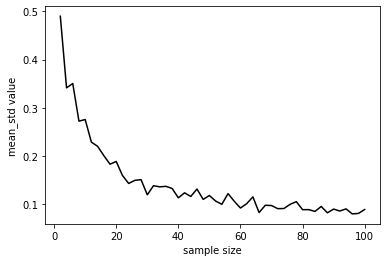

In [16]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

---

#### 표준오차 공식을 적용

In [17]:
SE = 0.8/np.sqrt(size_array)
SE

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

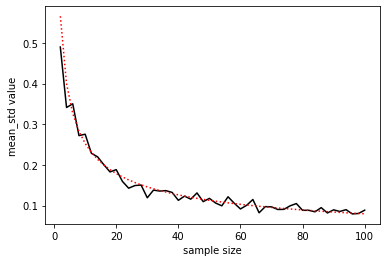

In [18]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, SE, color='red', ls='dotted')
plt.xlabel('sample size')
plt.ylabel('mean_std value')
plt.show()

#### 표본분산의 평균값은 모분산과 차이가 있다

In [19]:
sample_var_array = np.zeros(10000)
np.random.seed(13)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)
    
np.mean(sample_var_array)

0.5792337629333761

#### 불편분산을 사용하면 일부 극복할 수 있다

In [20]:
unbias_var_array = np.zeros(10000)
np.random.seed(12)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)
    
np.mean(unbias_var_array)

0.6367506890584265

#### 다양한 크기의 샘플을 준비

In [21]:
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

#### 불편분산을 샘플 크기마다 구하고

In [22]:
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(13)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)

#### 샘플이 커지면 분산이 모집단에 가까워진다

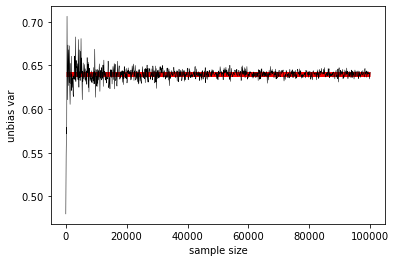

In [28]:
plt.plot(size_array, unbias_var_array_size, color='black', lw=0.5)
plt.xlabel('sample size')
plt.ylabel('unbias var')
plt.hlines(0.64, 0, 100000, color='red', lw=5)
plt.show()